## I. EXPLORATORY DATA ANALYSIS OF SENSED DATA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

import datetime
import json
import requests
import pandas as pd

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 8)

## 1. Importing a `.csv` file

In this first chapter, we provide a static `.csv` file to get familiarized with `Pandas` http://pandas.pydata.org/ Python Data Analysis library. We first use the `read_csv` method without any optional arguments to see what we get.

In [3]:
df = pd.read_csv('data/data.csv')

df.head() # Display the 5 first rows

,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
0,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
1,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
2,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
3,2017/08/07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A
4,2017/08/07 15:59:20,1,11,-70,0.4,51,13,70b3d5499904775c,25.74,75.6,Monitoring station A


In [6]:
# Let's check the data type of df object
type(df)

pandas.core.frame.DataFrame

`DataFrame` data type is key in `Pandas` and offers many useful possibilities.

In [40]:
# ******* YOUR TURN *******
# Display the first 10 rows of the `df` data frame
# Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

## Enter your code below and press (shift+Enter) to evaluate



To know the number of lines and columns, simply:

In [8]:
df.shape

(97, 11)

97 rows and 11 columns.

You might have noticed that we have no colum names and that the first row of our `data.csv` file has been interpreted as the column names. To solve it, we can explicitely specify these names.

In [9]:
column_names = ['time', 'channel', 'snr', 'rssi',
                'freq_error', 'bytes', 'packet_idx',
                'lora_mac', 'temperature', 'humidity',
                 'station_name']

In [10]:
df = pd.read_csv('data/data.csv', header=None, names=column_names)
df.head()

,time,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
0,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
1,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
3,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
4,2017/08/07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A


Take a look at the number of optional arguments that `.read_csv` method might receive: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

## 2. Selecting a subset of a dataframe

### Selection by label(s)

In [35]:
# Selecting all rows and two columns ()
df_selected = df.loc[:, ['time', 'temperature']]
df_selected.head()

,time,temperature
0,2017/08/07 15:59:01,25.10
1,2017/08/07 15:59:04,25.13
2,2017/08/07 15:59:07,25.19
3,2017/08/07 15:59:14,25.46
4,2017/08/07 15:59:17,25.60


In [36]:
# Selecting all rows with column from X to Y
df.loc[:, 'lora_mac':'humidity'].head()

,lora_mac,temperature,humidity
0,70b3d5499904775c,25.10,65.1
1,70b3d5499904775c,25.13,65.0
2,70b3d5499904775c,25.19,64.8
3,70b3d5499904775c,25.46,68.4
4,70b3d5499904775c,25.60,71.9


In [39]:
# Selecting rows with index from 0 to 3 and all columns
df.loc[0:3, :]

,time,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
0,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
1,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
3,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A


### Selection by positions(s)

In [44]:
# Selecting columns at position 7, 8 and 10 (starts at 0)
df.iloc[:, [7, 8, 10]].head()

,lora_mac,temperature,station_name
0,70b3d5499904775c,25.10,Monitoring station A
1,70b3d5499904775c,25.13,Monitoring station A
2,70b3d5499904775c,25.19,Monitoring station A
3,70b3d5499904775c,25.46,Monitoring station A
4,70b3d5499904775c,25.60,Monitoring station A


In [45]:
# ******* YOUR TURN *******
# Display the second and fourth row and first and third columns of the dataframe `df`
# Hints: you can use the .iloc method

## Enter your code below and press (shift+Enter) to evaluate


### The joy of time indexing
When dealing with time series, it is often convenient to select a subset of it (for instance all data from the same day or minutes, ...). Time indexing and selection helps.

In [46]:
# Indexing will make plotting and time queries easier
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)

In [48]:
df.head()

,time,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,,
2017-08-07 15:59:01,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
2017-08-07 15:59:04,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2017-08-07 15:59:07,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
2017-08-07 15:59:14,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
2017-08-07 15:59:17,2017/08/07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A


In [49]:
# Now, we don't need the time column anymore
df.drop('time', axis=1, inplace=True)

In [51]:
df.head(3)

,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,
2017-08-07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
2017-08-07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2017-08-07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A


Now, we can carry out easilty **partial time selection**.

In [52]:
# For instance select only measurement done at 15:59
df.loc['2017-08-07 15:59']

,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,
2017-08-07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
2017-08-07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2017-08-07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
2017-08-07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
2017-08-07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A
2017-08-07 15:59:20,1,11,-70,0.4,51,13,70b3d5499904775c,25.74,75.6,Monitoring station A
2017-08-07 15:59:23,1,12,-68,0.4,51,14,70b3d5499904775c,25.88,78.8,Monitoring station A
2017-08-07 15:59:26,1,12,-68,0.3,51,15,70b3d5499904775c,26.03,81.2,Monitoring station A
2017-08-07 15:59:30,1,12,-67,0.3,51,16,70b3d5499904775c,26.17,83.2,Monitoring station A


## 3. Plotting

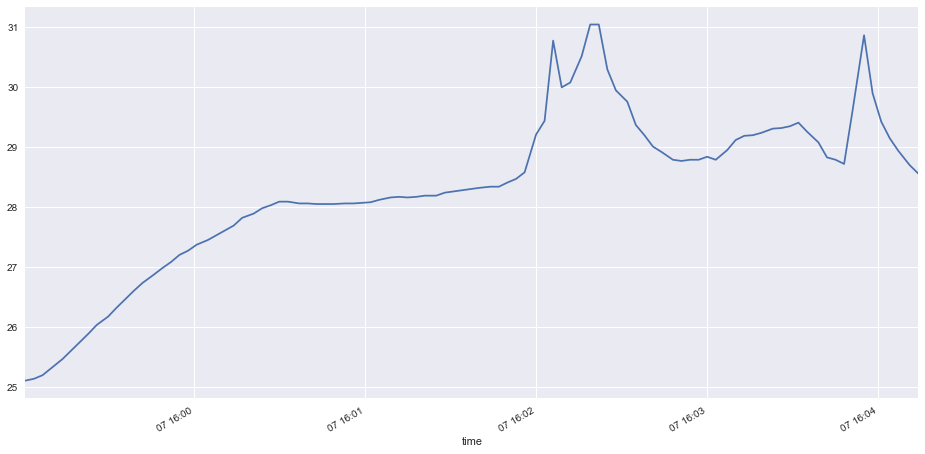

In [54]:
# Really can you make it easier?
df['temperature'].plot()

[<matplotlib.text.Text at 0x119400630>, <matplotlib.text.Text at 0x118f6f470>]

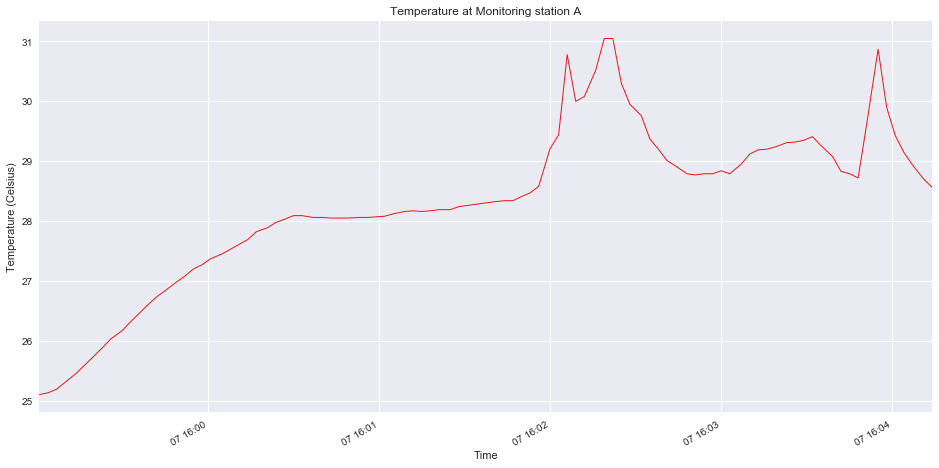

In [70]:
# Many options
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

ax = df['temperature'].plot(lw=1, colormap='Set1', title='Temperature at Monitoring station A')
ax.set(xlabel="Time", ylabel="Temperature (Celsius)")

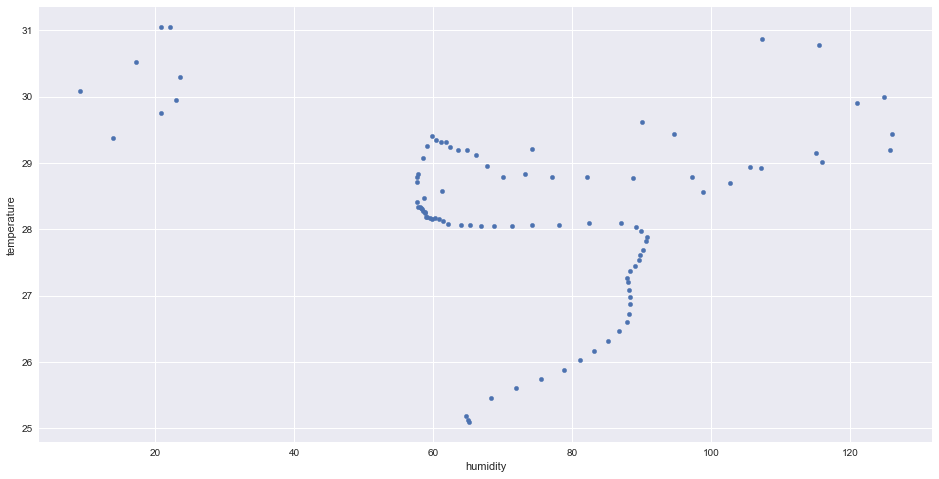

In [74]:
# Look at relationship between humidity and temperature. Interpret???
df.plot.scatter('humidity', 'temperature')